#Práctica 2a

***¿Qué he aprendido en esta práctica?***

Los MLP (MultiLayer Perceptron) Se trata de redes de tipo feed-forward, con neuronas de tipo perceptrón. La función de agregación es una suma ponderada, y la función de activación, un sigmoide, lo que permite un aprendizaje por retropropagación.

 formada por múltiples capas, de tal manera que tiene capacidad para resolver problemas que no son linealmente separables, lo cual es la principal limitación del perceptrón (también llamado perceptrón simple). El perceptrón multicapa puede estar totalmente o localmente conectado. En el primer caso cada salida de una neurona de la capa "i" es entrada de todas las neuronas de la capa "i+1", mientras que en el segundo cada neurona de la capa "i" es entrada de una serie de neuronas (región) de la capa "i+1".

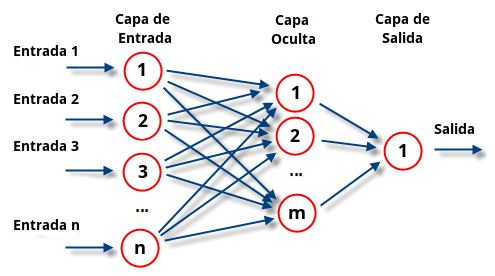

***Red Convolucional***

Las redes neuronales convolucionales consisten en múltiples capas de filtros convolucionales de una o más dimensiones. Después de cada capa, por lo general se añade una función para realizar un mapeo causal no-lineal.

Como cualquier  red empleada para clasificación, al principio estas redes tienen una  fase de extracción de características, compuesta de neuronas convolucionales , luego hay una reducción por muestreo y al final tendremos neuronas de perceptrón mas sencillas para realizar la clasificación final sobre las características extraídas.

La fase de extracción de características se asemeja al proceso estimulante en las células de la corteza visual. Esta fase se compone de capas alternas de neuronas convolucionales y neuronas de reducción de muestreo. Según progresan los datos a lo largo de esta fase, se disminuye su dimensionalidad, siendo las neuronas en capas lejanas mucho menos sensibles a perturbaciones en los datos de entrada, pero al mismo tiempo siendo estas activadas por características cada vez más complejas.


***Descargando los datos y extrayendo los datos en entrenamiento y prueba***

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz --no-check-certificate

import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt


with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)



--2021-04-13 09:52:13--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 1185830 (1.1M) [application/x-gzip]
Saving to: ‘p2_data1.pkl.gz’

p2_data1.pkl.gz     100%[===================>]   1.13M   349KB/s    in 3.7s    

2021-04-13 09:52:17 (310 KB/s) - ‘p2_data1.pkl.gz’ saved [1185830/1185830]



***Normalizando los valores entre 0-255 y comprovando el tamaño de los tensores (N, 32, 32, 1 )***

In [ ]:

x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)

(11769, 32, 32, 1)


***Función para visualizar los valores, ejemplo x_train, y_train***

In [ ]:
def view_data1(x, y):
    k = 0
    for i in range(4):
        for j in range(4):
            plt.subplot(4, 4, k+1)
            plt.imshow( x[k].reshape(32, 32), interpolation='none', cmap='gray')
            plt.title(r'$y_{%d}$ = %d' % (k, y[k]))
            plt.gca().axis('off')
            k += 1
    plt.show()

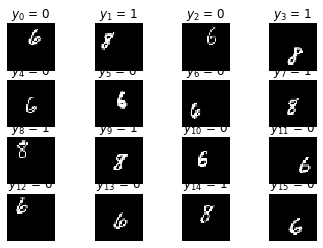

In [ ]:
view_data1(x_train, y_train)

**Ejemplo de Red Neuronal usando Keras, usando el módulo Sequential**     
Dando como entrada 100 neuronas y como salida 10

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations


model1 = keras.Sequential([
 keras.Input(shape=(100,)),
 layers.Dense(128),
 layers.Activation(activations.tanh),
 layers.Dense(10),
 layers.Softmax()
])

print( model1.summary() )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 14,218
Trainable params: 14,218
Non-trainable params: 0
_________________________________________________________________
None


***Dando como entrada las dimensiones del juego de datos, hacemos una cambio de tamaño para convertirlo en un vector que contemple las mismas dimensiones***

In [ ]:
model2 = keras.Sequential([
  keras.Input(shape=(32, 32, 1)),
  layers.Reshape( (1024,)),
  layers.Dense(128),
  layers.Activation(activations.tanh),
  layers.Dense(2),
  layers.Softmax(),
 ]) 
print( model2.summary() )


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
_________________________________________________________________
softmax_1 (Softmax)          (None, 2)                 0         
Total params: 131,458
Trainable params: 131,458
Non-trainable params: 0
_________________________________________________________________
None


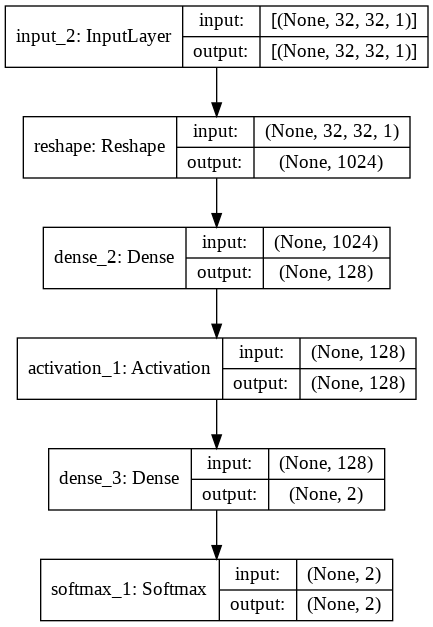

In [ ]:
keras.utils.plot_model(model2, 'model2.png', show_shapes=True)

***Compilamos nuestro modelo usando la funcion de coste SparseCategoricalCrossentropy ***

In [ ]:
model2.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

***Entrenamos el modelo con los datos de x_train, y_train, para ello le pasamos  Usaremos batch_size de 32 (reduciendo la necesidad de memoria), daremos 50 vueltas completas (o epochs), separamos los datos de entrenar y de pruebas con el parametro validation_split a un 85% vs 15% respectivamente***

In [ ]:
log = model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.15)

Epoch 1/50
313/313 [==============================] - 2s 4ms/step - loss: 0.6680 - sparse_categorical_accuracy: 0.5872 - val_loss: 0.4555 - val_sparse_categorical_accuracy: 0.7707
Epoch 2/50
313/313 [==============================] - 1s 2ms/step - loss: 0.4343 - sparse_categorical_accuracy: 0.7966 - val_loss: 0.3274 - val_sparse_categorical_accuracy: 0.8692
Epoch 3/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2893 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2176 - val_sparse_categorical_accuracy: 0.9230
Epoch 4/50
313/313 [==============================] - 1s 2ms/step - loss: 0.2073 - sparse_categorical_accuracy: 0.9301 - val_loss: 0.2134 - val_sparse_categorical_accuracy: 0.9185
Epoch 5/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1710 - sparse_categorical_accuracy: 0.9398 - val_loss: 0.1796 - val_sparse_categorical_accuracy: 0.9366
Epoch 6/50
313/313 [==============================] - 1s 2ms/step - loss: 0.1393 - sparse_categorica

***Para representar los datos de coste del resultado del modelo entrenado***

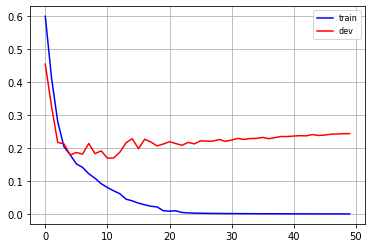

In [ ]:
plt.clf()
plt.plot(log.history['loss'], 'b')
plt.plot(log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = model2.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))


error rate test: 6.677019 %


In [ ]:
 model2.predict(x_test)

array([[9.9985600e-01, 1.4400232e-04],
       [9.3596637e-01, 6.4033568e-02],
       [9.9999988e-01, 7.4000972e-08],
       ...,
       [9.9999380e-01, 6.1682513e-06],
       [1.9020344e-10, 1.0000000e+00],
       [1.0000000e+00, 6.7603604e-14]], dtype=float32)

###Ejercicio de red MLP de vectores con dimención 1024

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz --no-check-certificate

import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt


with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

--2021-04-13 09:52:57--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 1185830 (1.1M) [application/x-gzip]
Saving to: ‘p2_data1.pkl.gz.1’

p2_data1.pkl.gz.1   100%[===================>]   1.13M   364KB/s    in 3.4s    

2021-04-13 09:53:02 (338 KB/s) - ‘p2_data1.pkl.gz.1’ saved [1185830/1185830]



In [ ]:
x_train = x_train / 255
x_test = x_test / 255

print(x_train.shape)

(11769, 32, 32, 1)


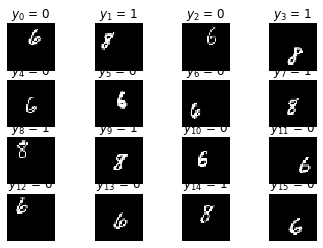

In [ ]:
def view_data1(x, y):
    k = 0
    for i in range(4):
        for j in range(4):
            plt.subplot(4, 4, k+1)
            plt.imshow( x[k].reshape(32, 32), interpolation='none', cmap='gray')
            plt.title(r'$y_{%d}$ = %d' % (k, y[k]))
            plt.gca().axis('off')
            k += 1
    plt.show()

view_data1(x_train, y_train)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
import matplotlib.pyplot as plt


In [ ]:
x_train.ndim

4

In [ ]:
print(x_train.shape)

(11769, 32, 32, 1)


In [ ]:
 print(x_train.dtype)

float64


In [ ]:
model3 = keras.Sequential()
model3.add(layers.Input(shape=(32, 32, 1)))
model3.add(layers.Reshape((1024,)))
model3.add(layers.Dense(128, activation='relu'))

model3.add(layers.Dense(2, activation='softmax'))


model3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 131,458
Trainable params: 131,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
x_test.shape

(1932, 32, 32, 1)

In [ ]:
log = model3.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

Epoch 1/50
295/295 [==============================] - 1s 3ms/step - loss: 0.5818 - sparse_categorical_accuracy: 0.6539 - val_loss: 0.2346 - val_sparse_categorical_accuracy: 0.9078
Epoch 2/50
295/295 [==============================] - 1s 2ms/step - loss: 0.2000 - sparse_categorical_accuracy: 0.9252 - val_loss: 0.1590 - val_sparse_categorical_accuracy: 0.9397
Epoch 3/50
295/295 [==============================] - 1s 2ms/step - loss: 0.1271 - sparse_categorical_accuracy: 0.9546 - val_loss: 0.1277 - val_sparse_categorical_accuracy: 0.9537
Epoch 4/50
295/295 [==============================] - 1s 2ms/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.1299 - val_sparse_categorical_accuracy: 0.9520
Epoch 5/50
295/295 [==============================] - 1s 2ms/step - loss: 0.0600 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1235 - val_sparse_categorical_accuracy: 0.9550
Epoch 6/50
295/295 [==============================] - 1s 2ms/step - loss: 0.0407 - sparse_categorica

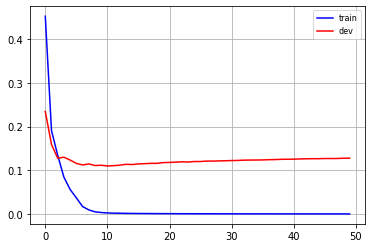

In [ ]:
plt.clf()
plt.plot(log.history['loss'], 'b')
plt.plot(log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = model3.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

error rate test: 3.778468 %


In [ ]:
model3.predict(x_test)

array([[9.9991572e-01, 8.4299114e-05],
       [9.9954742e-01, 4.5258953e-04],
       [7.1980196e-01, 2.8019810e-01],
       ...,
       [1.0000000e+00, 1.2557780e-10],
       [2.0159990e-11, 1.0000000e+00],
       [1.0000000e+00, 3.5819187e-14]], dtype=float32)

In [ ]:
model3.evaluate(x_test, y_test)

61/61 [==============================] - 0s 1ms/step - loss: 0.1586 - sparse_categorical_accuracy: 0.9622


[0.15863652527332306, 0.9622153043746948]

###***Red Convolucional***

***Ejemplo de modelo para red convolucional***

In [ ]:
model4 = keras.Sequential([
 keras.Input(shape=(32, 32, 1)),
 layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
 activation='relu', padding='same'),
 layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
 activation='relu', padding='same'),
 layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
 activation='relu', padding='same')
])


In [ ]:
model4.predict(x_test).shape

(1932, 4, 4, 64)

In [ ]:
model5 = keras.Sequential([
  keras.Input(shape=(32, 32, 1)),
  layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
  activation='relu', padding='same'),
  layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
  activation='relu', padding='same'),
  layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
  activation='relu', padding='same'),
  layers.Reshape( (4 * 4 * 64,)),
  ])

model5.predict(x_test).shape

(1932, 1024)

***Esta red usamos los mismos juegos de datos, psandola por una red convolucional y termnaldo en una tipo MLP,***

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz --no-check-certificate

import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt


with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

--2021-04-13 09:53:40--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 1185830 (1.1M) [application/x-gzip]
Saving to: ‘p2_data1.pkl.gz.2’

p2_data1.pkl.gz.2   100%[===================>]   1.13M   372KB/s    in 3.1s    

2021-04-13 09:53:44 (372 KB/s) - ‘p2_data1.pkl.gz.2’ saved [1185830/1185830]



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
import matplotlib.pyplot as plt

***Construimos nuestro modelo empezando por la red convolucional***

In [ ]:
model6 = keras.Sequential()   
##creamos nuestra primera capa convolucional
model6.add(layers.Input(shape=(32, 32, 1)))  
model6.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
activation='relu', padding='same'))
##creamos nuestra segunda capa convolucional
model6.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##creamos nuestra tercera capa convolucional
model6.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))
##Ahora se le aplica el reshape, convirtiendo el vector (N x H x W x C) en la matriz de tamaño (N x D)
model6.add(layers.Reshape((4 * 4 * 64,)))

##ahora se le pasa a una red neuronal de tipo MLP
model6.add(layers.Dense(128, activation='relu'))
model6.add(layers.Dense(64, activation='relu'))

model6.add(layers.Dense(2, activation='softmax'))


model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 16, 16, 16)        416       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

***Compilamos nuestro modelo***

In [ ]:
model6.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

***Entrenamos nuetro modelo  con el set de prueba***

In [ ]:
log = model6.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

Epoch 1/50
279/295 [===========================>..] - ETA: 0s - loss: nan - sparse_categorical_accuracy: 0.5142

KeyboardInterrupt: ignored

In [ ]:
model6.predict(x_test).shape

***Gráficamo***

In [ ]:
plt.clf()
plt.plot(log.history['loss'], 'b')
plt.plot(log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = model6.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

*** Red Convolucional tipo 2***

In [ ]:
model8 = keras.Sequential()   
##creamos nuestra primera capa convolucional
model8.add(layers.Input(shape=(32, 32, 1)))  
model8.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
activation='relu', padding='same'))
##creamos nuestra segunda capa convolucional
model8.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##creamos nuestra tercera capa convolucional
model8.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##Ahora se le aplica el Pooling, 
model8.add(layers.GlobalAveragePooling2D())

##ahora se le pasa a una red neuronal de tipo MLP
model8.add(layers.Dense(128, activation='relu'))
model8.add(layers.Dense(64, activation='relu'))

model8.add(layers.Dense(2, activation='softmax'))


model8.summary()

In [ ]:
model8.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
log = model8.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

In [ ]:
model8.predict(x_test).shape

In [ ]:
plt.clf()
plt.plot(log.history['loss'], 'b')
plt.plot(log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = model6.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

***inciso c***

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1_biased.pkl.gz --no-check-certificate

import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt


with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

--2021-04-13 14:39:28--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data1_biased.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 570571 (557K) [application/x-gzip]
Saving to: ‘p2_data1_biased.pkl.gz’

p2_data1_biased.pkl 100%[===================>] 557.20K   382KB/s    in 1.5s    

2021-04-13 14:39:29 (382 KB/s) - ‘p2_data1_biased.pkl.gz’ saved [570571/570571]



FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
import matplotlib.pyplot as plt

***red tipo MLP***

In [ ]:
x_test.shape

In [ ]:
view_data1(x_train, y_train)

In [ ]:
mlp = keras.Sequential()
mlp.add(layers.Input(shape=(32, 32, 1)))
mlp.add(layers.Reshape((1024,)))
mlp.add(layers.Dense(128, activation='relu'))

mlp.add(layers.Dense(2, activation='softmax'))


mlp.summary()

In [ ]:
mlp.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
mlp_log = mlp.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

In [ ]:
plt.clf()
plt.plot(mlp_log.history['loss'], 'b')
plt.plot(mlp_log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = mlp.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

In [ ]:
mlp.predict(x_test).shape


In [ ]:
mlp.evaluate(x_test, y_test)

***Red Convolucional tipo 1***

In [ ]:
with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

In [ ]:
x_test.shape

In [ ]:
cv1 = keras.Sequential()   
##creamos nuestra primera capa convolucional
cv1.add(layers.Input(shape=(32, 32, 1)))  
cv1.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
activation='relu', padding='same'))
##creamos nuestra segunda capa convolucional
cv1.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##creamos nuestra tercera capa convolucional
cv1.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))
##Ahora se le aplica el reshape, convirtiendo el vector (N x H x W x C) en la matriz de tamaño (N x D)
cv1.add(layers.Reshape((4 * 4 * 64,)))

##ahora se le pasa a una red neuronal de tipo MLP
cv1.add(layers.Dense(128, activation='relu'))
cv1.add(layers.Dense(64, activation='relu'))

cv1.add(layers.Dense(2, activation='softmax'))


cv1.summary()

In [ ]:
cv1.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
cv1_log = cv1.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

In [ ]:
plt.clf()
plt.plot(cv1_log.history['loss'], 'b')
plt.plot(cv1_log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = cv1.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

***Red convolucional 2***

In [ ]:
with gzip.open('p2_data1.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)

In [ ]:
cv2 = keras.Sequential()   
##creamos nuestra primera capa convolucional
cv2.add(layers.Input(shape=(32, 32, 1)))  
cv2.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(2, 2),
activation='relu', padding='same'))
##creamos nuestra segunda capa convolucional
cv2.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##creamos nuestra tercera capa convolucional
cv2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2),
activation='relu', padding='same'))

##Ahora se le aplica el Pooling, 
cv2.add(layers.GlobalAveragePooling2D())

##ahora se le pasa a una red neuronal de tipo MLP
cv2.add(layers.Dense(128, activation='relu'))
cv2.add(layers.Dense(64, activation='relu'))

cv2.add(layers.Dense(2, activation='softmax'))


cv2.summary()

In [ ]:
cv2.compile(
 loss=keras.losses.SparseCategoricalCrossentropy(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
 metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
cv2_log = cv2.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

In [ ]:
plt.clf()
plt.plot(cv2_log.history['loss'], 'b')
plt.plot(cv2_log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

In [ ]:
y_pred_test = cv2.predict(x_test)
err = np.sum( y_pred_test.argmax(1) != y_test )
print('error rate test: %f %%' % (err / len(y_test) * 100))

###Regresión Multiple

In [ ]:
!wget https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data2.pkl.gz --no-check-certificate
with gzip.open('p2_data2.pkl.gz', 'rb') as f:
 x_train, y_train, x_test, y_test = pickle.load(f)
x_train = x_train / 255
x_test = x_test / 255
y_train = y_train / 255
y_test = y_test / 255

--2021-04-13 14:39:39--  https://dihana.cps.unizar.es/~cadrete/mlbio/p2_data2.pkl.gz
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:443... connected.
  Unable to locally verify the issuer's authority.
	requested host name ‘dihana.cps.unizar.es’.
HTTP request sent, awaiting response... 200 OK
Length: 13801588 (13M) [application/x-gzip]
Saving to: ‘p2_data2.pkl.gz.1’

p2_data2.pkl.gz.1   100%[===================>]  13.16M  3.34MB/s    in 5.0s    

2021-04-13 14:39:45 (2.63 MB/s) - ‘p2_data2.pkl.gz.1’ saved [13801588/13801588]



***Visualizando los datos***

In [ ]:
print(x_train.shape)
print(x_test.shape)

(11769, 32, 32, 1)
(1932, 32, 32, 1)


In [ ]:
x_train = x_train / 255.
y_train = y_train / 255.

print(x_train.shape)
print(x_test.shape)

(11769, 32, 32, 1)
(1932, 32, 32, 1)


(-0.5, 31.5, 31.5, -0.5)

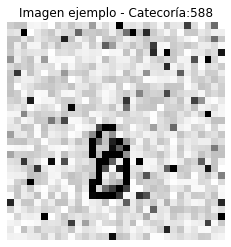

In [ ]:
img = 100
plt.imshow(x_train[img,:].reshape(32,32), cmap='gray_r')
plt.title('Imagen ejemplo - Catecoría:' + str(np.argmax(y_train[img])))
plt.axis('off')

In [ ]:
def view_data2(x, y):
    k = 0
    for i in range(2):
        for j in range(2):
            plt.subplot(2, 4, 2*k+1)
            plt.imshow( x[k].reshape(32, 32), interpolation='none', cmap='gray')
            plt.title(r'$x_{%d}$' % k)
            plt.gca().axis('off')
            
            plt.subplot(2, 4, 2*k+2)
            plt.imshow( y[k].reshape(32, 32), interpolation='none',cmap='gray')
            plt.title(r'$y_{%d}$' % k)
            plt.gca().axis('off')
            k += 1
    plt.show()

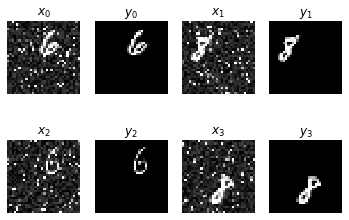

In [ ]:
view_data2(x_train, y_train)

In [ ]:
mse = keras.Sequential()   
##creamos nuestra primera capa convolucional
mse.add(layers.Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,1)))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

##creamos nuestra segunda capa convolucional
mse.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

##creamos nuestra tercera capa convolucional
mse.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
mse.add(layers.MaxPooling2D(pool_size=(2,2)))

mse.add(layers.Conv2DTranspose(64,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))
mse.add(layers.Conv2DTranspose(128,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))
mse.add(layers.Conv2DTranspose(1,strides=(2, 2), kernel_size=(3,3), activation='relu', padding='same' ))

mse.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 8, 8, 64)        

In [ ]:
mse.compile(
 loss=keras.losses.MeanSquaredError(),
 optimizer=keras.optimizers.SGD(learning_rate=0.1),
 metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError()])


In [ ]:
mse_log = mse.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.20)

Epoch 1/50
295/295 [==============================] - 27s 89ms/step - loss: 4.5780e-07 - mean_squared_error: 4.5780e-07 - mean_absolute_error: 2.5786e-04 - val_loss: 4.4647e-07 - val_mean_squared_error: 4.4647e-07 - val_mean_absolute_error: 2.6502e-04
Epoch 2/50
295/295 [==============================] - 26s 89ms/step - loss: 4.5570e-07 - mean_squared_error: 4.5570e-07 - mean_absolute_error: 2.6847e-04 - val_loss: 4.4574e-07 - val_mean_squared_error: 4.4574e-07 - val_mean_absolute_error: 2.6270e-04
Epoch 3/50
295/295 [==============================] - 26s 88ms/step - loss: 4.5338e-07 - mean_squared_error: 4.5338e-07 - mean_absolute_error: 2.6749e-04 - val_loss: 4.4538e-07 - val_mean_squared_error: 4.4538e-07 - val_mean_absolute_error: 2.6590e-04
Epoch 4/50
295/295 [==============================] - 27s 91ms/step - loss: 4.5329e-07 - mean_squared_error: 4.5329e-07 - mean_absolute_error: 2.6764e-04 - val_loss: 4.4520e-07 - val_mean_squared_error: 4.4520e-07 - val_mean_absolute_error: 2.6

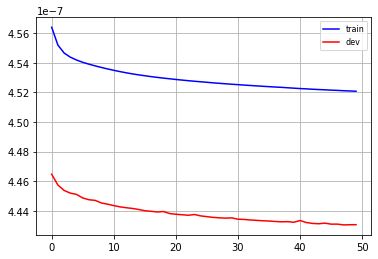

In [ ]:
plt.clf()
plt.plot(mse_log.history['loss'], 'b')
plt.plot(mse_log.history['val_loss'], 'r')
plt.grid(True)
plt.gca().legend(['train','dev'], loc='upper right',fontsize=8)

***Extraer pdf***

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Práctica 2a.ipynb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7pWZzeYcXHf32pr2_eKP7XIkf10SUhA5ThxqoWqcTVG0BnLRjnrGQ


In [ ]:
! ls drive/MyDrive/Colab\ Notebooks